# Chapter 9: Quantum Circuits

Multi-qubit circuits, CNOT, SWAP, and controlled operations.

---

**Prerequisites:**
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [1]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt

# Add utilities to path
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library.standard_gates.u import UGate
from qiskit_aer import Aer

from Chapter08_QuantumGates_functions import (simulate_statevector, simulate_measurements, runCircuitOnIBMQuantum, 
                                              analyzeCircuitForHardware, plot_measurement_results)

from Chapter09_QuantumCircuits_functions import (ryMatrix, rzMatrix,hadamards,innerProductEstimation, woodbury_rank1_query)
print('Setup complete!')

Setup complete!


## Multi-qubit Theoretical State

In [2]:
circuit = QuantumCircuit(3, 3)  
circuit.x(0)
circuit.id(1)
circuit.h(2)
psi = Statevector(circuit)
display(psi.draw('latex'))

<IPython.core.display.Latex object>

## Multi-qubit circuit

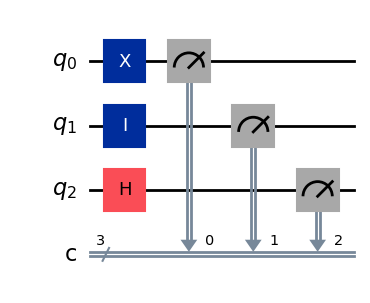

Counts: {'101': 509, '001': 491}


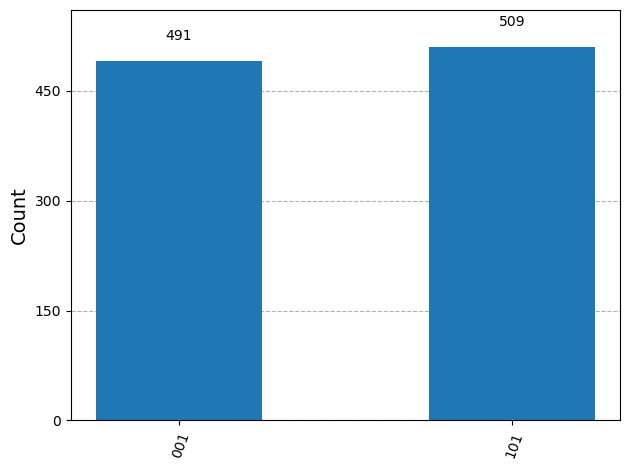

In [3]:
circuit = QuantumCircuit(3, 3)  
circuit.x(0)
circuit.id(1)
circuit.h(2)
circuit.measure([0,1,2], [0,1,2]) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 1000)
print('Counts:',counts)
plot_histogram(counts)

## Unitary operator

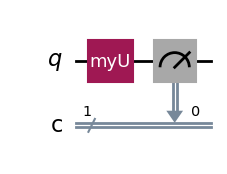

Counts: {'0': 491, '1': 509}


In [4]:
circuit = QuantumCircuit(1, 1) 
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
circuit.unitary(UMatrix,0,'myU')
circuit.measure(0,0) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 1000)
print('Counts:',counts)



## Universal operator

In [5]:
def UniversalOperator(theta,phi,lambdaAngle):
	U = np.array([[np.cos(theta/2),-np.exp(1j*lambdaAngle)*np.sin(theta/2)],
			      [np.exp(1j*phi)*np.sin(theta/2), np.exp(1j*(phi+lambdaAngle))*np.cos(theta/2)]])
	return U

U = UniversalOperator(np.pi/2,np.pi,np.pi)
print(U)
U = UniversalOperator(np.pi,0,0)
print(U)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [-0.70710678+8.65956056e-17j  0.70710678-1.73191211e-16j]]
[[ 6.123234e-17+0.j -1.000000e+00-0.j]
 [ 1.000000e+00+0.j  6.123234e-17+0.j]]


## CNOT Operator

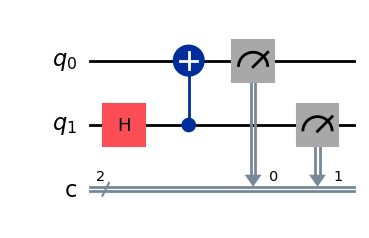

Counts: {'11': 482, '00': 518}


In [6]:
circuit = QuantumCircuit(2, 2)  
circuit.h(1) 
circuit.cx(1,0)
circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 1000)
print('Counts:',counts)

## Unitary operator of a circuit

In [7]:
circuit = QuantumCircuit(2, 2)  
circuit.cx(1,0)
U = Operator(circuit)
print("U: \n", U.data)

U: 
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


## Controlled Hadamard

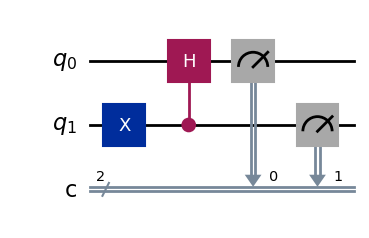

Counts: {'10': 517, '11': 483}


In [8]:
circuit = QuantumCircuit(2, 2)  
circuit.x(1) # try id(1), h(1)
circuit.ch(1,0)
circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots= 1000)
print('Counts:',counts)

## CNOT and Controlled Hadamard

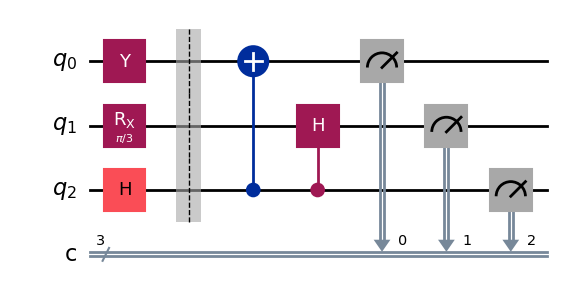

Counts: {'100': 2534, '110': 2507, '011': 1307, '001': 3652}


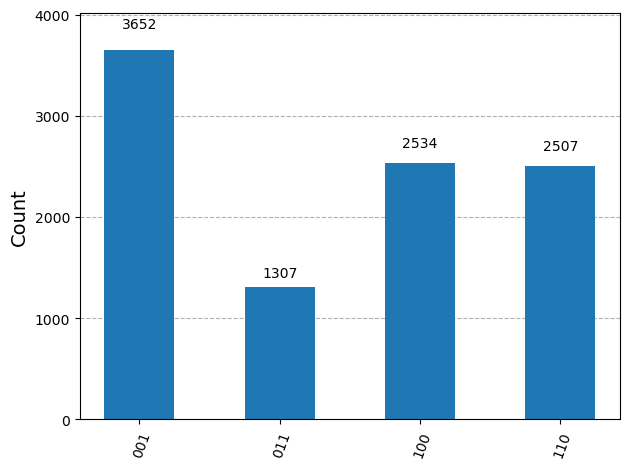

In [9]:
circuit = QuantumCircuit(3, 3) 
circuit.y(0) 
circuit.rx(np.pi/3,1) 
circuit.h(2) 
circuit.barrier()
circuit.cx(2,0)
circuit.ch(2,1)
circuit.measure([0,1,2], [0,1,2]) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 10000)
print('Counts:',counts)
plot_histogram(counts)

## Controlled Phase

<IPython.core.display.Latex object>

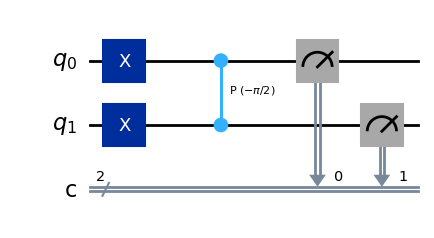

Counts: {'11': 1000}


In [10]:
circuit = QuantumCircuit(2, 2)  
circuit.x(0) 
circuit.x(1) 
circuit.cp(-np.pi/2,0,1)
psi = Statevector(circuit)
display(psi.draw('latex'))

circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl') )
counts = simulate_measurements(circuit,shots = 1000)
print('Counts:',counts)

## Controlled Phase with Hadamard

<IPython.core.display.Latex object>

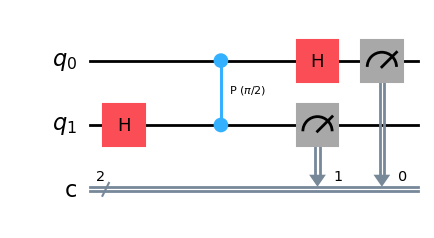

Counts: {'11': 277, '10': 249, '00': 252, '01': 222}


In [11]:
circuit = QuantumCircuit(2, 2)  
circuit.h(1) 
circuit.cp(np.pi/2,0,1)
circuit.h(0) 
psi = Statevector(circuit)
display(psi.draw('latex'))

circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl')) 
counts = simulate_measurements(circuit,shots =1000)
print('Counts:',counts)


## 4 qubit Circuit

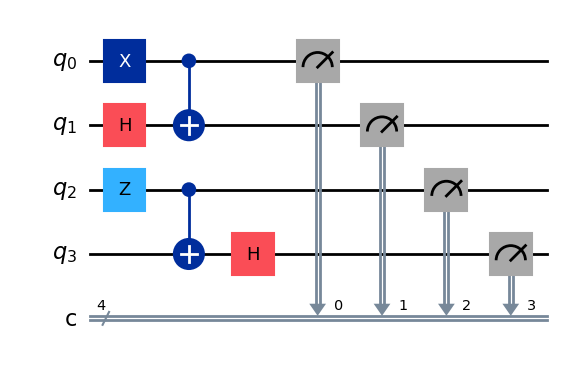

In [12]:
circuit = QuantumCircuit(4, 4)  
circuit.x(0) 
circuit.h(1) 
circuit.z(2)
circuit.cx(0, 1)
circuit.cx(2, 3)
circuit.h(3)
circuit.cx
circuit.measure([0,1,2,3], [0,1,2,3]) 
display(circuit.draw('mpl') )

## Simple Swap

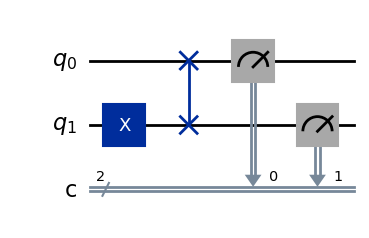

Counts: {'01': 1000}


In [13]:
circuit = QuantumCircuit(2, 2)  
circuit.x(1) 
circuit.swap(1,0)
circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 1000)
print('Counts:',counts)


## Controlled Unitary

<IPython.core.display.Latex object>

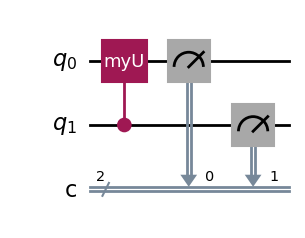

In [14]:
circuit = QuantumCircuit(2, 2) 
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
U = UnitaryGate(UMatrix,'myU')
UControl = U.control(1)
circuit.append(UControl,[1,0])
psi = Statevector(circuit) #extract the state
display(psi.draw('latex')) # print
circuit.measure([0,1],[0,1]) 
display(circuit.draw('mpl'))

## Toffoli

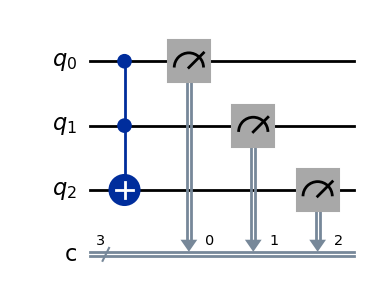

In [15]:
circuit = QuantumCircuit(3, 3) 
circuit.ccx(0,1,2)
circuit.measure([0,1,2],[0,1,2])
display(circuit.draw('mpl')) 

##  Hadamard Test

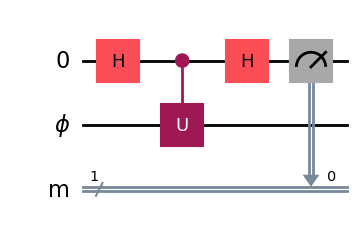

Counts: {'0': 840, '1': 160}


In [16]:
zeroQubit = QuantumRegister(1, '0')
phiQubit = QuantumRegister(1, '\u03D5')
cl = ClassicalRegister(1,'m')
circuit = QuantumCircuit(zeroQubit,phiQubit, cl) 
circuit.h(0)
#circuit.sdg(0)
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
U = UnitaryGate(UMatrix,'U')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 1000)
print('Counts:',counts)

## Inner Product

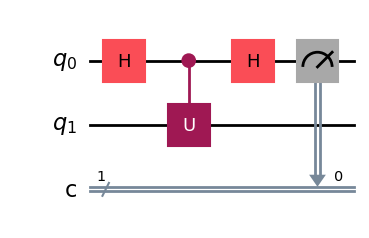

Counts: {'0': 94, '1': 6}


In [17]:
circuit = QuantumCircuit(2, 1) 
circuit.h(0)
a = np.sqrt(3)
b = 1/np.sqrt(2)
UMatrix = b*np.array([[(a+1)/2,(a-1)/2],[(a-1)/2,(-a-1)/2]])
U = UnitaryGate(UMatrix,'U')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 100)
print('Counts:',counts)

## Inner Product Real

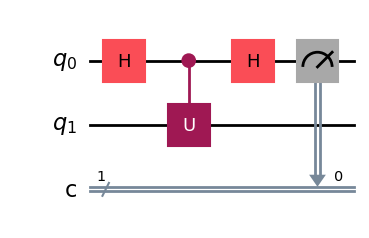

dotprod: 0.8648


In [18]:
U_phi = ryMatrix(2*np.pi/3)
U_psi = ryMatrix(np.pi/3)
UMatrix = np.matmul(U_phi.conj().T,U_psi)

circuit = QuantumCircuit(2, 1) 
circuit.h(0)
U = UnitaryGate(UMatrix,'U')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl'))
shots = 10000
counts = simulate_measurements(circuit,shots =shots)

dotprod = 2*counts['0']/shots - 1
print('dotprod:',dotprod)

## N-Dimensional Inner Product

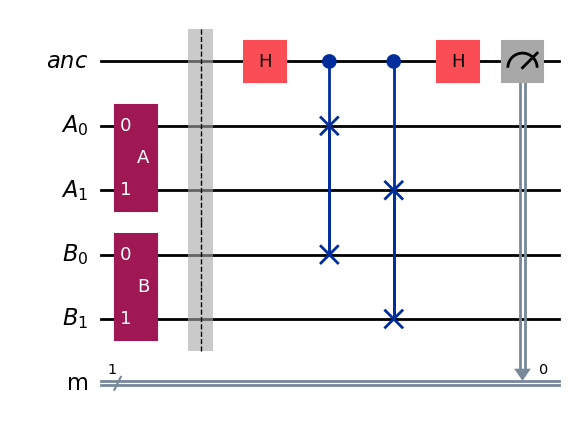

Exact dot product: 0.5122776997551453
Quantum dot product: 0.5061620293937505


In [19]:
m = 2 # number of qubits in each register
N = 2**m # Number of elements in the vector (2^m)
u_A = np.random.rand(N) # Example: Displacement vector A
u_B = u_A  + 5*np.random.rand(N) # Example: Displacement vector B

u_A = u_A / np.linalg.norm(u_A)
u_B = u_B / np.linalg.norm(u_B)

quantum_dotprod, circuit = innerProductEstimation(u_A, u_B, shots = 10000)
display(circuit.draw('mpl'))
classical_dotprod= np.abs(np.dot(u_A, u_B))
print('Exact dot product:',classical_dotprod)
print('Quantum dot product:',quantum_dotprod)


## Controlled Swap

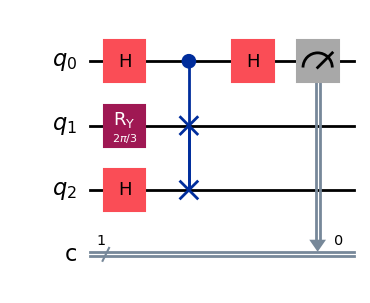

Counts: {'0': 9645, '1': 355}
dotprodSqr: 0.929


In [20]:
circuit = QuantumCircuit(3,1) 
circuit.h(0)
circuit.ry(2*np.pi/3, 1)
circuit.h(2)
circuit.cswap(0, 1, 2)
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl')) 
counts = simulate_measurements(circuit,10000)
print('Counts:',counts)

P0 = (counts['0'])/10000
print('dotprodSqr:',2*P0-1)

## State controlled CNOT

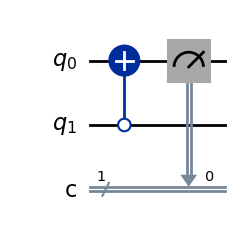

In [21]:
circuit = QuantumCircuit(2, 1) 
circuit.cx(1, 0, ctrl_state=0)
circuit.measure([0],[0]) 
display(circuit.draw('mpl'))

## Multi-CNOT Control

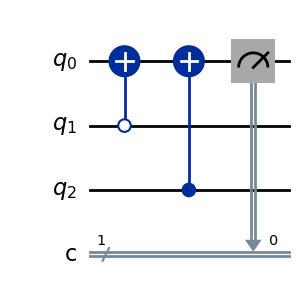

In [22]:
circuit = QuantumCircuit(3, 1) 
circuit.cx(1, 0,ctrl_state=0)
circuit.cx(2, 0)
circuit.measure([0],[0]) 
display(circuit.draw('mpl'))

## Multi-Controlled CNOT with Hadamards

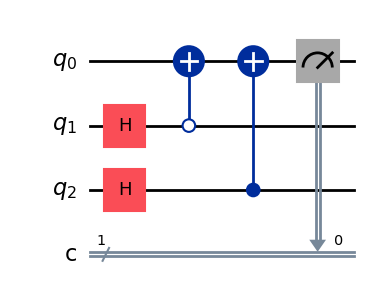

In [23]:
circuit = QuantumCircuit(3, 1) 
circuit.h(1)
circuit.h(2)
circuit.cx(1, 0,ctrl_state=0)
circuit.cx(2, 0)
circuit.measure([0],[0]) 
display(circuit.draw('mpl'))

## State-controlled U Gate

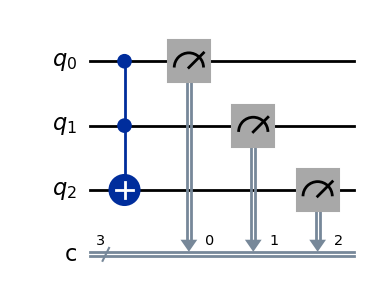

In [24]:
circuit = QuantumCircuit(3, 3) 
circuit.ccx(0,1,2)
circuit.measure([0,1,2],[0,1,2])
display(circuit.draw('mpl')) 

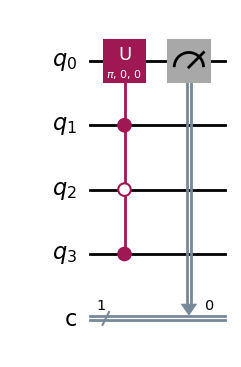

In [25]:
circuit = QuantumCircuit(4, 1) 
cu_gate = UGate(np.pi, 0, 0).control(3, ctrl_state = '101')
# Not sure why the following does not work
# circuit.cry(theta = np.pi/3,target_qubit= 0,
#      control_qubit = [1,2,3], ctrl_state = '101')
circuit.append(cu_gate,[1,2,3,0])
circuit.measure([0],[0]) 
display(circuit.draw('mpl') )


## Woodbury equation
A demo from the paper " A near-term quantum algorithm for solving linear systems of equations based on the woodbury identity", O'Malley, et. al, 2022. arXiv preprint arXiv:2205.00645.

In [26]:
# Problem: (I + u*v^T)x = b, compute <z|x>
n = 3  # 3 qubits = 8-dimensional vectors

z_prep = hadamards(n)  # Query vector |z>
b_prep = hadamards(n)  # RHS |b>
v_prep = hadamards(n)  # Update |v>
u_prep = hadamards(n)  # Update |u>

# Woodbury parameters
alpha = 1.0
beta = 1.0

# Run quantum algorithm
result = woodbury_rank1_query(
    z_prep, b_prep, v_prep, u_prep, 
    alpha, beta, 
    shots=10
)

print(f"Quantum result: {result:.4f}")
print(f"Expected (analytical): 0.5000")  # For uniform states

Quantum result: 0.5000
Expected (analytical): 0.5000
